# 1. Create an MA plot to visualize RNA-seq data with the average gene abundance on the x-axis and fold-change on the y-axis

I will be comparing male10 and female10 to observe if there are any changes in expression between sex at this time point.

# Load Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load fpkms.csv

In [3]:
df_fpkms = pd.read_csv( "../../qbb2021/data/fpkms.csv" )
df_fpkms

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


# Check, report, subset

In [4]:
type(df_fpkms)

pandas.core.frame.DataFrame

In [5]:
df_fpkms.shape

(34718, 18)

In [6]:
df_fpkms.loc[:,"t_name"]

0        FBtr0114258
1        FBtr0346770
2        FBtr0302440
3        FBtr0302347
4        FBtr0346769
            ...     
34713    FBtr0114187
34714    FBtr0304147
34715    FBtr0114216
34716    FBtr0114222
34717    FBtr0114283
Name: t_name, Length: 34718, dtype: object

# Subset male10 and store in a variable

In [7]:
df_fpkms.loc[:,"male_10"]

0         0.000000
1         0.000000
2         0.000000
3        23.712564
4         0.000000
           ...    
34713     0.000000
34714     0.000000
34715     2.011199
34716     0.000000
34717     0.000000
Name: male_10, Length: 34718, dtype: float64

In [8]:
male_10 = df_fpkms.loc[:,"male_10"]

# Subset female10 and store in a variable

In [9]:
df_fpkms.loc[:,"female_10"]

0         0.000000
1         0.000000
2         0.000000
3        21.894249
4         0.000000
           ...    
34713     0.000000
34714     0.000000
34715    13.475658
34716     0.000000
34717     0.000000
Name: female_10, Length: 34718, dtype: float64

In [10]:
female_10 = df_fpkms.loc[:,"female_10"]

# Average gene abundance for each gene between the two samples and log transform

In [11]:
average = (1/2) * (np.log2(male_10+1) + np.log2(female_10+1))
average

0        0.000000
1        0.000000
2        0.000000
3        4.572043
4        0.000000
           ...   
34713    0.000000
34714    0.000000
34715    2.722948
34716    0.000000
34717    0.000000
Length: 34718, dtype: float64

# Log ratio for each gene between the two samples

In [12]:
ratio = ((male_10+1) / (female_10+1))
log_ratio = np.log2(ratio)
log_ratio

0        0.000000
1        0.000000
2        0.000000
3        0.110259
4        0.000000
           ...   
34713    0.000000
34714    0.000000
34715   -2.265219
34716    0.000000
34717    0.000000
Length: 34718, dtype: float64

# MA plot

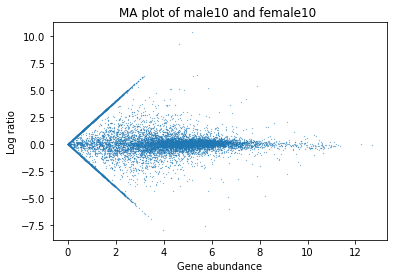

In [13]:
x = average
y = log_ratio 
fig, ax = plt.subplots()
ax.scatter(x, y, s=0.05)
ax.set_title("MA plot of male10 and female10 ")
ax.set_xlabel("Gene abundance")
ax.set_ylabel("Log ratio")
plt.show()

# 2. Update your plot of FBtr0331261 abundance over time with:

# Subset FBtr0331261

In [14]:
df_fpkms = pd.read_csv( "../../qbb2021/data/fpkms.csv", index_col="t_name" )
df_fpkms.loc["FBtr0331261",:]

gene_name         Sxl
male_10             0
male_11             0
male_12             0
male_13             0
male_14A            0
male_14B            0
male_14C            0
male_14D      2.11732
female_10           0
female_11           0
female_12           0
female_13           0
female_14A    46.0339
female_14B    30.6056
female_14C    38.9564
female_14D    124.908
Name: FBtr0331261, dtype: object

In [15]:
df_sxl = df_fpkms.loc["FBtr0331261",:]

# Subset male and female

In [16]:
male = df_sxl.index[1:9]
male

Index(['male_10', 'male_11', 'male_12', 'male_13', 'male_14A', 'male_14B',
       'male_14C', 'male_14D'],
      dtype='object')

In [17]:
female = df_sxl.index[10:18]
female

Index(['female_11', 'female_12', 'female_13', 'female_14A', 'female_14B',
       'female_14C', 'female_14D'],
      dtype='object')

In [18]:
male_values = df_sxl[1:9]
male_values

male_10           0
male_11           0
male_12           0
male_13           0
male_14A          0
male_14B          0
male_14C          0
male_14D    2.11732
Name: FBtr0331261, dtype: object

In [28]:
female_values = df_sxl[9:18]
female_values

female_10           0
female_11           0
female_12           0
female_13           0
female_14A    46.0339
female_14B    30.6056
female_14C    38.9564
female_14D    124.908
Name: FBtr0331261, dtype: object

In [20]:
xuse = ['10','11','12','13','14A','14B','14C','14D']

# Time course plot with male 

In [21]:
x = xuse
y = male_values

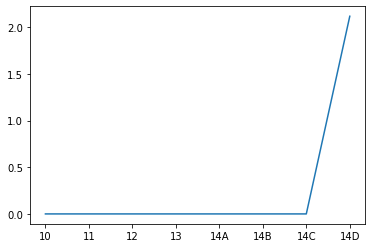

In [22]:
fig, ax = plt.subplots()
ax.plot(x,y)
plt.show()

# Time course plot with female

In [29]:
x2 = xuse
y2 = female_values

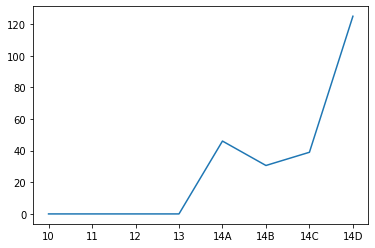

In [30]:
fig, ax = plt.subplots()
ax.plot(x2,y2)
plt.show()

# Overlayed male and female time course

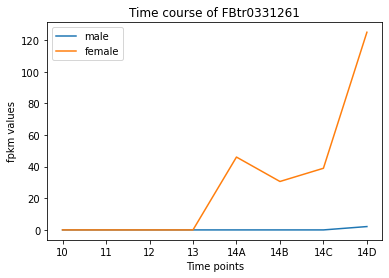

In [31]:
fig, ax = plt.subplots()
ax.plot( x, y, label = 'male' )
ax.plot( x2, y2, label = 'female')
ax.set_title("Time course of FBtr0331261")
ax.set_xlabel("Time points")
ax.set_ylabel("fpkm values")
ax.legend()
plt.show()

# Time course with stage 14 replicates

In [32]:
df_fpkms = pd.read_csv( "../../qbb2021/data/replicates.csv", index_col="t_name" )
df_fpkms.loc["FBtr0331261",:]

male_14A            0
male_14B            0
male_14C            0
male_14D            0
female_14A          0
female_14B    79.1035
female_14C    182.233
female_14D    2.40947
gene_name         Sxl
Name: FBtr0331261, dtype: object

In [38]:
df_rep = df_fpkms.loc["FBtr0331261",:]

In [39]:
male_values_rep = df_rep[0:4]
male_values_rep

male_14A    0
male_14B    0
male_14C    0
male_14D    0
Name: FBtr0331261, dtype: object

In [43]:
female_values_rep = df_rep[4:8]
female_values_rep 

female_14A          0
female_14B    79.1035
female_14C    182.233
female_14D    2.40947
Name: FBtr0331261, dtype: object

In [44]:
xuse_rep = ["14A","14B","14C","14D"]

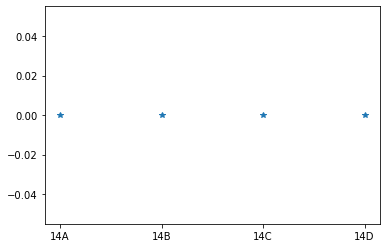

In [47]:
x3 = xuse_rep
y3 = male_values_rep
fig, ax = plt.subplots()
ax.plot(x3,y3, '*')
plt.show()

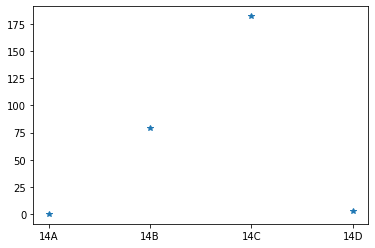

In [48]:
x4 = xuse_rep
y4 = female_values_rep
fig, ax = plt.subplots()
ax.plot(x4,y4, '*')
plt.show()

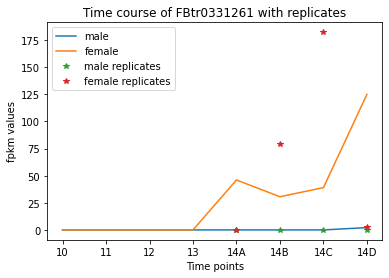

In [53]:
fig, ax = plt.subplots()
ax.plot( x, y, label = 'male' )
ax.plot( x2, y2, label = 'female')
ax.plot( x3, y3, '*', label = 'male replicates')
ax.plot( x4, y4, '*', label = 'female replicates')
ax.set_title("Time course of FBtr0331261 with replicates")
ax.set_xlabel("Time points")
ax.set_ylabel("fpkm values")
ax.legend()
plt.show()